In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [37]:
display(data.describe(include='object'))

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


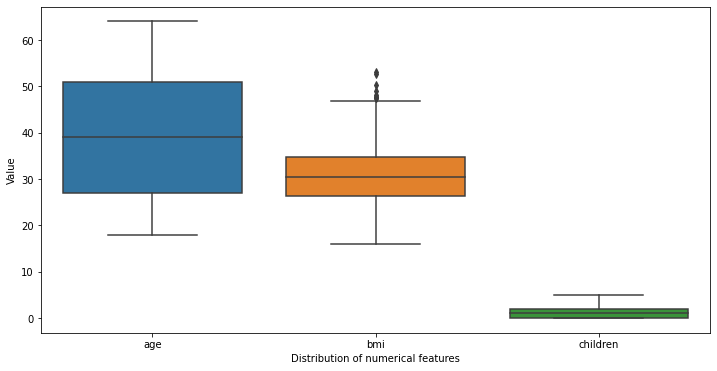

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data[['age', 'bmi', 'children']], ax=ax)
ax.set_xlabel('Distribution of numerical features') #название оси абсцисс
ax.set_ylabel('Value'); #название оси ординат

<BarContainer object of 2 artists>

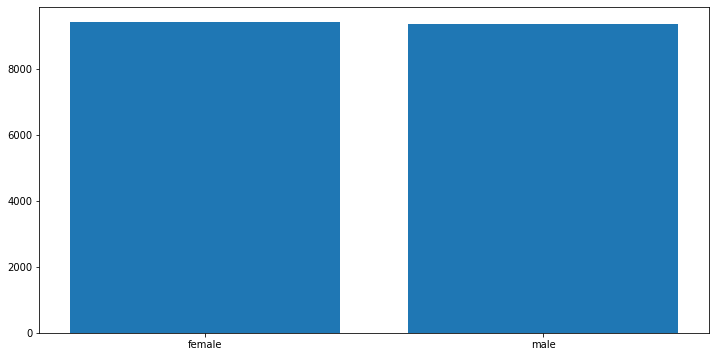

In [15]:
sex_median_charges = data.groupby(['sex'])['charges'].median()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar (x = sex_median_charges.index, height = sex_median_charges)

<BarContainer object of 2 artists>

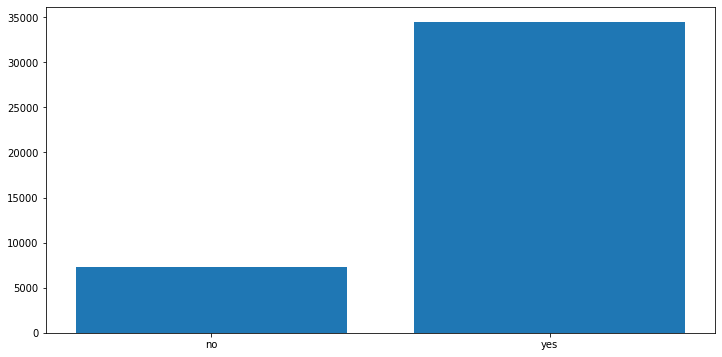

In [18]:
smoker_median_charges = data.groupby(['smoker'])['charges'].median()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar (x = smoker_median_charges.index, height = smoker_median_charges)

<BarContainer object of 4 artists>

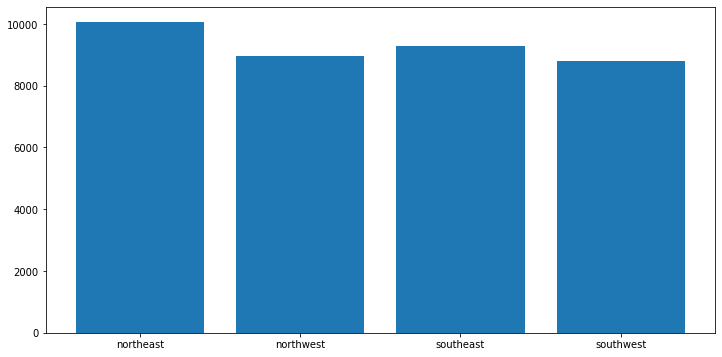

In [19]:
region_median_charges = data.groupby(['region'])['charges'].median()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar (x = region_median_charges.index, height = region_median_charges)

<AxesSubplot:xlabel='charges', ylabel='age'>

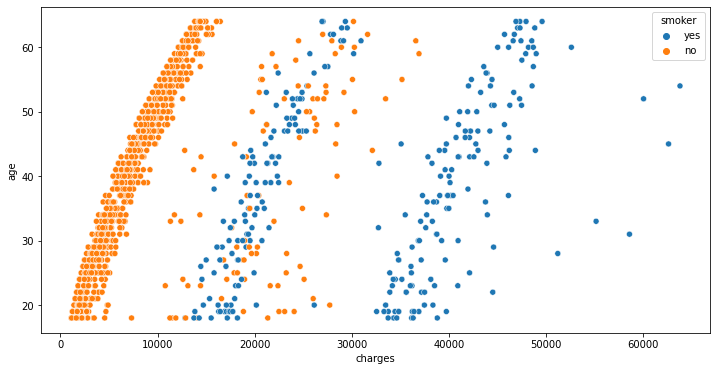

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot (data=data, x='charges', y = 'age', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='bmi'>

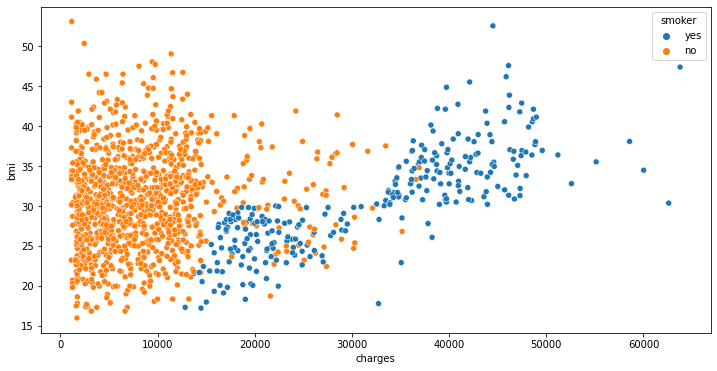

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot (data=data, x='charges', y = 'bmi', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='children'>

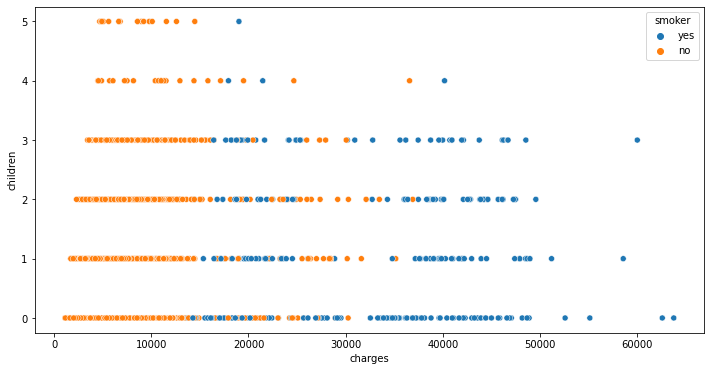

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot (data=data, x='charges', y = 'children', hue='smoker')

In [38]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [39]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape {}'.format(X_train.shape))
print('Test shape {}'.format(X_test.shape))

Train shape (1070, 9)
Test shape (268, 9)


In [46]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
round(lr_model.intercept_, 3)


-12390.804

In [47]:
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

In [54]:
print('R^2 train {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
print('MAE train {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
print('MAPE train {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
print('')
print('R^2 test {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
print('MAE test {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
print('MAPE test {:.0f}'.format((metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))

R^2 train 0.742
MAE train 4208
MAPE train 42

R^2 test 0.784
MAE test 4181
MAPE test 47


In [55]:
train_error = y_train - y_train_predict
train_error

560      2099.298430
1285      189.941813
1142    17964.219582
969     -2531.551681
486      2387.346121
            ...     
1095     -402.121792
1130      976.539987
1294      490.040058
860      8799.136393
1126    -1238.485028
Name: charges, Length: 1070, dtype: float64

In [56]:
test_error = y_test - y_test_predict
test_error

764       125.517976
887     -1796.571643
890     -7527.427762
1293     -152.784951
259      6777.118343
            ...     
109      7994.031168
575       461.399102
535     -1620.436882
543     22850.136498
846     -2445.885653
Name: charges, Length: 268, dtype: float64

In [57]:
errors = pd.DataFrame({'train errors': train_error, 'test errors': test_error})
errors

,train errors,test errors
0,-8312.607061,NaN
1,-2101.229629,NaN
2,-2538.073290,NaN
3,18171.073994,NaN
4,-1771.112219,NaN
...,...,...
1333,-1643.341608,NaN
1334,-1248.357113,NaN
1335,-2828.506397,NaN
1336,655.485742,NaN


<AxesSubplot:>

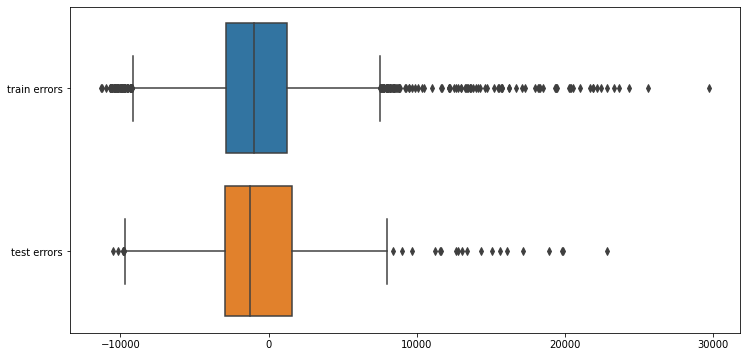

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=errors, orient='h', ax=ax)


In [62]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Amount of columns {}'.format(X_train_scaled_poly.shape[1]))

Amount of columns 54


In [66]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [67]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_test_predict = lr_poly.predict(X_test_scaled_poly)
print('R^2 test {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))

R^2 test 0.867


In [69]:
lr_poly.coef_

array([-2.33028309e+16,  2.12499672e+15,  6.75959877e+14,  3.29810193e+15,
        4.54586897e+15, -3.26490013e+16,  8.42194047e+15,  5.43379764e+16,
        7.00548945e+15,  8.40400000e+03,  8.23000000e+02,  9.20000000e+02,
       -1.66000000e+03,  1.58000000e+02,  2.33028309e+16,  2.33028309e+16,
        2.33028309e+16,  2.33028309e+16, -2.85049214e+15,  6.73625000e+02,
       -1.23237500e+03,  2.24375000e+02,  7.25495424e+14,  7.25495424e+14,
        7.25495424e+14,  7.25495424e+14, -9.64653125e+03,  1.56012500e+03,
        5.47755625e+04, -6.75959877e+14, -6.75959877e+14, -6.75959877e+14,
       -6.75959877e+14, -2.10800000e+03, -2.24200000e+03, -3.29810193e+15,
       -3.29810193e+15, -3.29810193e+15, -3.29810193e+15,  6.98822140e+14,
       -5.24469111e+15, -5.24469111e+15, -5.24469111e+15, -5.24469111e+15,
        4.38679470e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.79700521e+15,  0.00000000e+00,  0.00000000e+00, -4.31190307e+16,
        0.00000000e+00,  

In [71]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict - lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)


Train R^2: 0.842
Train MAE: 2905
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Test MAPE: 30


In [72]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict - ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict = ridge_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2905
Train MAPE: 29


Test R^2: 0.863
Test MAE: 2861
Test MAPE: 31
